# Chirality Check

In chemistry, a molecule is chiral if it cannot be superimposed onto its mirror image by any combination of translation and rotation. These non-superposable mirror images are called enantiomers which share identical chemical and physical properties, but have distinct chemical reactivity and optical rotation properties.

This example shows how easily the `Procrustes` library can be used to check whether two geometries of the CHFClBr molecule are enantiomers using the `IOData` library to obtain their three-dimensional coordinates from XYZ files (**Fig. (i)**). This is done by testing whether their coordinates can be matched through translation and rotation (i.e., rotational Procrustes); the obtained Procrustes error of 26.09 Å reveals that these two structures are not identical. However, it is confirmed that the two coordinates are enantiomers because they can be matched through translation, rotation, and reflection (i.e., orthogonal Procrustes) gives a Procrustes error of $4.43 \times 10^{-8} Å$; thus, reflection is essential to match the structures.

![Fig. 1 Enantiomers prediction of CHFClBr with rotational-orthogonal Procrustes by comparing the atoms coordinates.](notebook_data/chirality_checking/chirality_checking.png "Fig. 1 Enantiomers prediction of CHFClBr with rotational-orthogonal Procrustes by comparing the atoms coordinates.")

In [ ]:
# install matplotlib
!pip install matplotlib

# install IOData to handle XYZ files
!pip install git+https://github.com/theochem/iodata.git@master

In [1]:
# load the libraries
import numpy as np

from iodata import load_one
from procrustes import orthogonal, rotational

In [2]:
# load CHClFBr enantiomers' coordinates from XYZ files
a = load_one("notebook_data/chirality_checking/enantiomer1.xyz").atcoords
b = load_one("notebook_data/chirality_checking/enantiomer2.xyz").atcoords

In [3]:
# rotational Procrustes on a & b coordinates
result_rot = rotational(a, b, translate=True, scale=False)
print("Error =", result_rot.error)

Error = 26.08554575402178


In [4]:
# define a function to plot the coordinates
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def plot_atom_coordinates(coords1, coords2,
                          figsize=(12, 10),
                          fontsize_label=14,
                          fontsize_title=16,
                          fontsize_legend=16,
                          label1=None,
                          label2=None,
                          title=None,
                          figfile=None):
    """Plot Cartesian coordinates of given atoms.

    Parameters
    ----------
    coords1: np.ndarray
        Cartesian coordinates of given atom set 1.
    coords2: np.ndarray
        Cartesian coordinates of given atom set 2.
    figsize : (float, float), optional
        Figure size with width and height in inchies.
    fontsize_label: int, optional
        The font size for labels. Default=14.
    fontsize_label: int, optional
        The font size for title. Default=16.
    label1 : str, optional
        Label for coords1. Default=None.
    label2 : str, optional
        Label for coords2. Default=None.
    title : str, optional
        Figure title. Default=None.
    figfile : str, optional
        Figure file name to save it. Default=None.

    """
    fig = plt.figure(figsize=figsize)
    ax = Axes3D(fig)

    ax.scatter(xs=coords1[:, 0], ys=coords1[:, 1], zs=coords1[:, 2],
               marker="o", color="blue", s=55, label=label1)
    ax.scatter(xs=coords2[:, 0], ys=coords2[:, 1], zs=coords2[:, 2],
               marker="o", color="red", s=55, label=label2)

    ax.set_xlabel("X", fontsize=fontsize_label)
    ax.set_ylabel("Y", fontsize=fontsize_label)
    ax.set_zlabel("Z", fontsize=fontsize_label)
    ax.legend(fontsize=fontsize_legend, loc="best")

    plt.title(title,
              fontsize=fontsize_title)
    # save figure to a file
    if figfile:
        plt.savefig(figfile)

    plt.show()

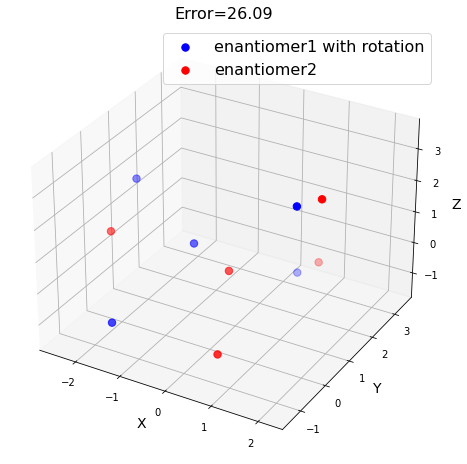

In [5]:
# rotated coordinates
a_rot = np.dot(a, result_rot.t)

# plot coordinates with only rotation
plot_atom_coordinates(a_rot, b,
                      figsize=(8, 6),
                      fontsize_label=14,
                      fontsize_title=16,
                      fontsize_legend=16,
                      label1="enantiomer1 with rotation",
                      label2="enantiomer2",
                      title="Error={:0.2f}".format(result_rot.error),
                      figfile=None)

In [6]:
# orthogonal Procrustes on a & b coordinates
result_ortho = orthogonal(a, b, translate=True, scale=False)
print("Error =", result_ortho.error)

Error = 4.432878638510348e-08


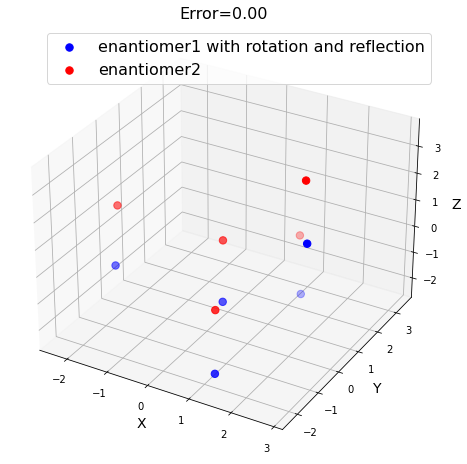

In [7]:
# rotated and refelction coordinates
a_ortho = np.dot(a, result_ortho.t)

# plot coordinates with only rotation
plot_atom_coordinates(a_ortho, b,
                      figsize=(8, 6),
                      fontsize_label=14,
                      fontsize_title=16,
                      fontsize_legend=16,
                      label1="enantiomer1 with rotation and reflection",
                      label2="enantiomer2",
                      title="Error={:0.2f}".format(result_ortho.error),
                      figfile=None)